# Segmentation

## Let’s get to work!

In [1]:
# general imports:
import os
import importlib
from torch import nn, cuda
from torch import optim
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# my imports (reload all modules):
from data.dataset import load_data_deep_crack
from models.unet import UNet
from training.metrics import DiceLoss
from training.train import train
from utils import save_model_files
from utils import log_training_result


import data.dataset
import models.unet
import training.metrics
import training.train
import utils
importlib.reload(data.dataset)
importlib.reload(models.unet)
importlib.reload(training.metrics)
importlib.reload(training.train)
importlib.reload(utils)

<module 'utils' from 'd:\\01_adatmat_elte\\03_thesis\\concrete_crack_thesis\\src\\utils.py'>

In [3]:
import training.train
importlib.reload(training.train)

<module 'training.train' from 'd:\\01_adatmat_elte\\03_thesis\\concrete_crack_thesis\\src\\training\\train.py'>

In [4]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
print(f'Number of visible CUDA devices: {cuda.device_count()}')
cuda.is_available()
# NOTE: when referring to a CUDA device, torch will only know about visible devices
#       so while currently we will be using gpu05
#       this will be device `cuda:0`

Number of visible CUDA devices: 1


True

#### Loading the data

In [5]:
data_source ='../../DeepCrack/dataset/DeepCrack'
train_image_dir = data_source + '/train_img'
train_mask_dir = data_source + '/train_lab'
test_image_dir = data_source + '/test_img'
test_mask_dir = data_source + '/test_lab'

In [6]:
train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2])

This gives us 240 train and 60 validation samples.


With CPU: 4m 12s


With CUDA: 3m 6s

In [7]:
model = UNet(   img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64)  
loss = DiceLoss()
optimizer = optim.Adam(params = model.parameters(), lr = 5*1e-4)
dice_idcs = list(np.load('../saved_models/unet_5/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models/unet_5/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models/unet_5/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models/unet_5/train_loss.npy'))
val_loss = list(np.load('../saved_models/unet_5/val_loss.npy'))
best_model_wts = {}
model.load_state_dict(torch.load('../saved_models/unet_5/model_state.pth', weights_only=True))

<All keys matched successfully>

In [8]:
train(model, loss, optimizer, train_dl, val_dl, num_epochs = 100, accum_scale = 4, dice_idcs = dice_idcs, epoch_dice_idcs = epoch_dice_idcs, val_dice_idcs = val_dice_idcs, best_model_wts = best_model_wts, train_loss=train_loss, val_loss=val_loss)

d:\01_AdatMat_Elte\03_THESIS\concrete_crack_thesis\venv\Lib\site-packages\torch\nn\modules\conv.py:549: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1037.)
  return F.conv2d(


Train loss:  0.13525170187155405
Epoch  1 . finished.
Validation loss:  0.14875236352284749
Train loss:  0.1388455907503764
Epoch  2 . finished.
Validation loss:  0.1339239716529846
Train loss:  0.13260619541009266
Epoch  3 . finished.
Validation loss:  0.12556981245676677
Train loss:  0.13252532283465068
Epoch  4 . finished.
Validation loss:  0.13499550819396972
Train loss:  0.12394094169139862
Epoch  5 . finished.
Validation loss:  0.12938876946767172
Train loss:  0.12486244440078735
Epoch  6 . finished.
Validation loss:  0.13618965148925782
Train loss:  0.1252383917570114
Epoch  7 . finished.
Validation loss:  0.1362817843755086
Train loss:  0.12255187630653382
Epoch  8 . finished.
Validation loss:  0.13685321410497028
Train loss:  0.139231742421786
Epoch  9 . finished.
Validation loss:  0.19788157145182292
Train loss:  0.12976682682832083
Epoch  10 . finished.
Validation loss:  0.14553672472635906
Train loss:  0.1383482058842977
Epoch  11 . finished.
Validation loss:  0.14621325333

In [47]:
optimizer = optim.Adam(params = model.parameters(), lr = 5*1e-4)
train(model, loss, optimizer, train_dl, val_dl, num_epochs = 100, accum_scale = 4, dice_idcs = dice_idcs, epoch_dice_idcs = epoch_dice_idcs, val_dice_idcs = val_dice_idcs, best_model_wts = best_model_wts, train_loss=train_loss, val_loss=val_loss)

Train loss:  0.5813903172810873
Epoch  1 . finished.
Validation loss:  0.49841534296671547
Train loss:  0.4904309908548991
Epoch  2 . finished.
Validation loss:  0.47543233235677085
Train loss:  0.4470237096150716
Epoch  3 . finished.
Validation loss:  0.42911815643310547
Train loss:  0.41482292811075844
Epoch  4 . finished.
Validation loss:  0.3936620076497396
Train loss:  0.376863702138265
Epoch  5 . finished.
Validation loss:  0.360662587483724
Train loss:  0.3393758138020833
Epoch  6 . finished.
Validation loss:  0.3502888043721517
Train loss:  0.3165644963582357
Epoch  7 . finished.
Validation loss:  0.3032132466634115
Train loss:  0.2974185307820638
Epoch  8 . finished.
Validation loss:  0.320260492960612
Train loss:  0.28873376846313475
Epoch  9 . finished.
Validation loss:  0.32857252756754557
Train loss:  0.2723426818847656
Epoch  10 . finished.
Validation loss:  0.28737478256225585
Train loss:  0.26845003763834635
Epoch  11 . finished.
Validation loss:  0.2632951100667318
Tra

KeyboardInterrupt: 

In [9]:
save_model_files('../saved_models/unet_6/', {'model_state':model.state_dict(), 'best_model_wts':best_model_wts}, {'dice_idcs':dice_idcs, 'epoch_dice_idcs':epoch_dice_idcs,'val_dice_idcs':val_dice_idcs,'train_loss':train_loss, 'val_loss':val_loss})

In [25]:
train_loss_loaded = np.load('../saved_models/unet_4/train_loss.npy')
val_loss_loaded = np.load('../saved_models/unet_4/val_loss.npy')
model_state_loaded = torch.load('../saved_models/unet_4/model_state.pth')

In [10]:
log_training_result('../saved_models/training_log.csv', {
    "timestamp": pd.Timestamp.now(),
    "weights_file": "unet_6/",
    "epochs": 100,
    "learning_rate": 0.0005,
    "batch_size": 4,
    "accum_scale": 4,
    "comment": "Previous run (unet_5) continued.",
    "augmentation": "rotate+randomCrop"
})

In [50]:
plt.figure(figsize = (8, 8))
plt.plot(dice_idcs)
plt.grid()

plt.xlabel('iteration')
plt.ylabel('Dice index')
plt.show()

In [21]:
plt.figure(figsize = (8, 8))
plt.plot(epoch_dice_idcs)
plt.plot(val_dice_idcs)
plt.grid()

plt.xlabel('Epoch number')
plt.ylabel('Dice index')
plt.show()

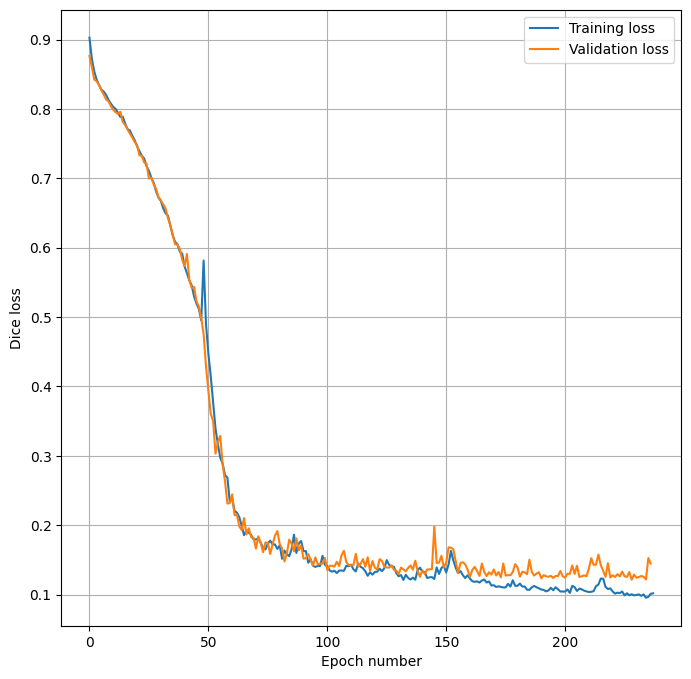

In [11]:
plt.figure(figsize = (8, 8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.grid()

plt.xlabel('Epoch number')
plt.ylabel('Dice loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

In [40]:
import time
t = time.time()
# do stuff
elapsed = time.time() - t
print(elapsed)

0.0


In [19]:
print(img.shape)

torch.Size([3, 384, 544])


C:\Users\Csaba\AppData\Local\Temp\ipykernel_13924\449585325.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_plot = np.array(img).transpose(1, 2, 0)
C:\Users\Csaba\AppData\Local\Temp\ipykernel_13924\449585325.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_plot = np.array(mask).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8588237..1.2627451].
C:\Users\Csaba\AppD

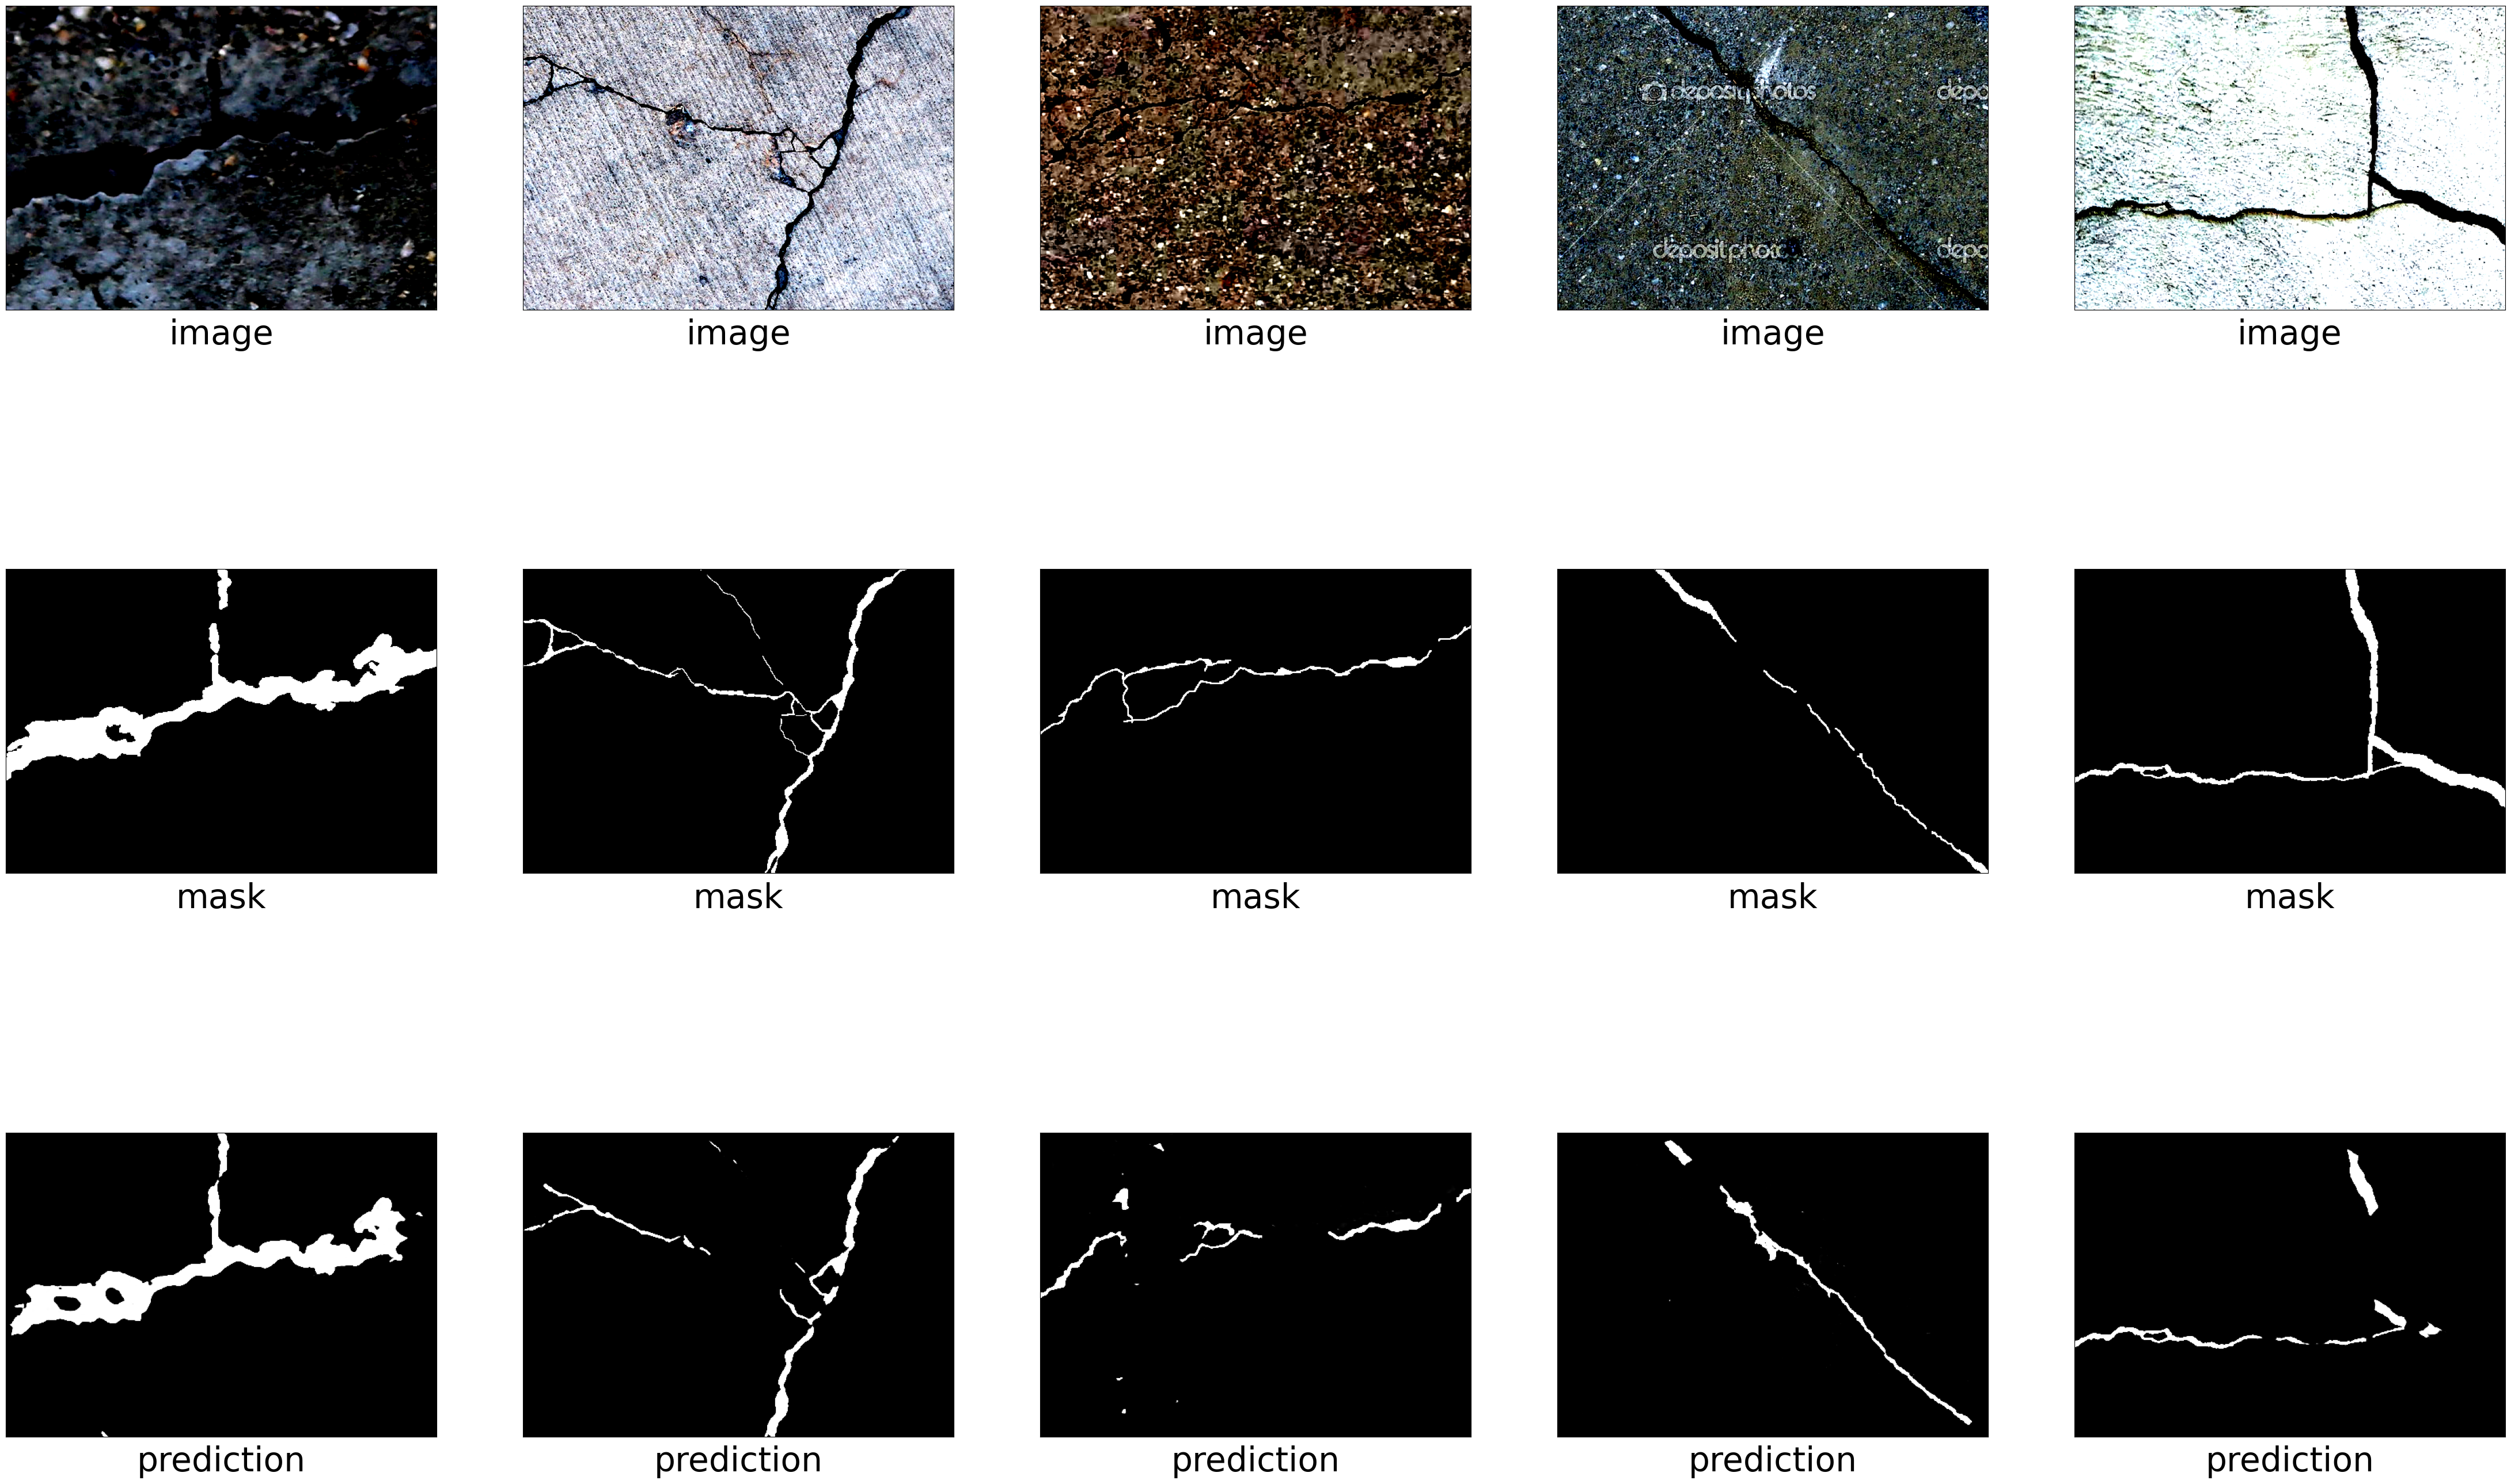

In [52]:
# visualising model predictions
fig = plt.figure(figsize = (56, 36))
for i in range(5):
    img, mask = val_dataset[i].values()

    img_plot = np.array(img).transpose(1, 2, 0)
    mask_plot = np.array(mask).transpose(1, 2, 0)
    subplot = fig.add_subplot(3, 5, i + 1)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('image', size = 42)
    plt.imshow(img_plot.squeeze())

    subplot = fig.add_subplot(3, 5, i + 6)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('mask', size = 42)
    plt.imshow(mask_plot.squeeze(), cmap = 'gray')
    #t = time.time()
    with torch.no_grad():
        pred = model(img.to('cuda').reshape((1, *img.shape)))
        #pred = model(img)
    #elapsed = time.time() - t
    #print(elapsed)
    subplot = fig.add_subplot(3, 5, i + 11)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('prediction', size = 42)
    plt.imshow(pred.cpu().squeeze(), cmap = 'gray')